# 1. Introduction

In this study, a cross-sectional survey is conducted with a sample size of 1182 students of different age groups from different educational institutions in Delhi National Capital Region (NCR).

The outbreak of COVID-19 affected the lives of all sections of society as people were asked to self-quarantine in their homes to prevent the spread of the virus. The lockdown had serious implications on mental health, resulting in psychological problems including frustration, stress, and depression. This survey contains a total of 1182 individuals of different age groups from various educational institutes in Delhi-National Capital Region (NCR), India. It shows the impact of COVID-19 on:

- students of different age groups
- time spent on online classes
- time spent on self-study
- medium used for learning
- sleeping habits
- daily fitness routine
- subsequent effects on weight
- subsequent effects on social life
- subsequent effects on mental health

# 2. Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2024-08-13 17:14:16.289188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 17:14:16.289334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 17:14:16.461790: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv')
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


# 3. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [4]:
df.isnull().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                        17
Time spent on TV     

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

ID                                                                                    0
Region of residence                                                                   0
Age of Subject                                                                        0
Time spent on Online Class                                                            0
Rating of Online Class experience                                                     0
Medium for online class                                                               0
Time spent on self study                                                              0
Time spent on fitness                                                                 0
Time spent on sleep                                                                   0
Time spent on social media                                                            0
Prefered social media platform                                                        0
Time spent on TV                

In [7]:
# Rename columns
df.columns = ['ID','Region','Age','time_online_class','rating_online_class','medium_online_class','time_self_study','time_fitness','time_sleep','time_social_media','preferred_social_media','time_tv','num_meals_per_day','change_in_wt','health_issue_lockdown','stress_busters','time_utilized','more_connected','miss_most']
df

,ID,Region,Age,time_online_class,rating_online_class,medium_online_class,time_self_study,time_fitness,time_sleep,time_social_media,preferred_social_media,time_tv,num_meals_per_day,change_in_wt,health_issue_lockdown,stress_busters,time_utilized,more_connected,miss_most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [8]:
df['Region'].unique()

array(['Delhi-NCR', 'Outside Delhi-NCR'], dtype=object)

In [9]:
df['rating_online_class'].unique()

array(['Good', 'Excellent', 'Very poor', 'Average', 'Poor'], dtype=object)

In [10]:
df['rating_online_class'].value_counts()

rating_online_class
Very poor    403
Average      372
Good         217
Excellent     93
Poor          30
Name: count, dtype: int64

In [11]:
df['medium_online_class'].unique()

array(['Laptop/Desktop', 'Smartphone', 'Tablet', 'Any Gadget',
       'Smartphone or Laptop/Desktop'], dtype=object)

In [12]:
df['medium_online_class'].value_counts()

medium_online_class
Laptop/Desktop                  538
Smartphone                      530
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: count, dtype: int64

In [13]:
df['preferred_social_media'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'Reddit',
       'Snapchat', 'Twitter', 'Telegram', 'Facebook', 'Elyment', 'None ',
       'Quora', 'Talklife', 'WhatsApp'], dtype=object)

In [14]:
df['preferred_social_media'].value_counts()

preferred_social_media
Instagram    335
Whatsapp     321
Youtube      306
Linkedin      57
Facebook      50
Twitter       25
Snapchat       8
Reddit         5
Telegram       3
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: count, dtype: int64

In [15]:
df['preferred_social_media'].replace({'Whatsapp':'WhatsApp','None ':'None'}, inplace=True)
df['preferred_social_media'].value_counts()

preferred_social_media
Instagram    335
WhatsApp     322
Youtube      306
Linkedin      57
Facebook      50
Twitter       25
Snapchat       8
Reddit         5
Telegram       3
Elyment        1
None           1
Quora          1
Talklife       1
Name: count, dtype: int64

In [16]:
df['health_issue_lockdown'].unique()

array(['NO', 'YES'], dtype=object)

In [17]:
df['stress_busters'].unique()

array(['Cooking', 'Scrolling through social media', 'Listening to music',
       'Watching web series', 'Social Media',
       'Coding and studying for exams', 'Online surfing',
       'live stream watching', 'Online gaming', 'Reading books',
       'Dancing', 'Talking with friends ', 'Talking to your relatives',
       'sketching,reading books,meditation,songs', 'Sleep', 'Crying',
       'Many of these', 'drawing ', 'Meditation', 'Cricket',
       'Anime Manga', 'Sleeping', 'Reading', 'Sketching and writing',
       'Writing', 'pubg', 'Web Series', 'Talking', 'Workout ',
       'Whatever want', 'Indoor Games',
       'watching movies,reading books,games,listening to music,sleep,dancing',
       'gardening cartoon',
       'listening to music,reading books and dancing.',
       'Dont get distreessed',
       ' listening music, motion design, graphic design, sleeping.',
       'Business', 'Many among these ', 'Talk with childhood friends.',
       'Exercise', 'Netflix, Friends and Books

In [18]:
df['stress_busters'].replace({'Scrolling through social media':'Social Media','Reading books':'Reading',
                              'Watching web series':'Web Series','Sleeping':'Sleep',
                              'Talking with friends ':'Talking','Talking to your relatives':'Talking',
                              'Many among these ':'Many of these','Talk with childhood friends.':'Talking',
                             'Workout ':'Exercise','Talking to friends':'Talking','I run':'Running',
                             'Exercising':'Exercise','working out and some physical activity':'Exercise',
                             'Gym':'Exercise','workout':'Exercise'}, inplace=True)

In [19]:
df['stress_busters'].value_counts()

stress_busters
Listening to music                260
Online gaming                     168
Web Series                        114
Sleep                             101
Social Media                       95
                                 ... 
singing                             1
Cardio                              1
I cant de-stress myslef             1
Writing my own Comics & novels      1
Watching YouTube                    1
Name: count, Length: 68, dtype: int64

# 4. Data Visualization

To know about outliers

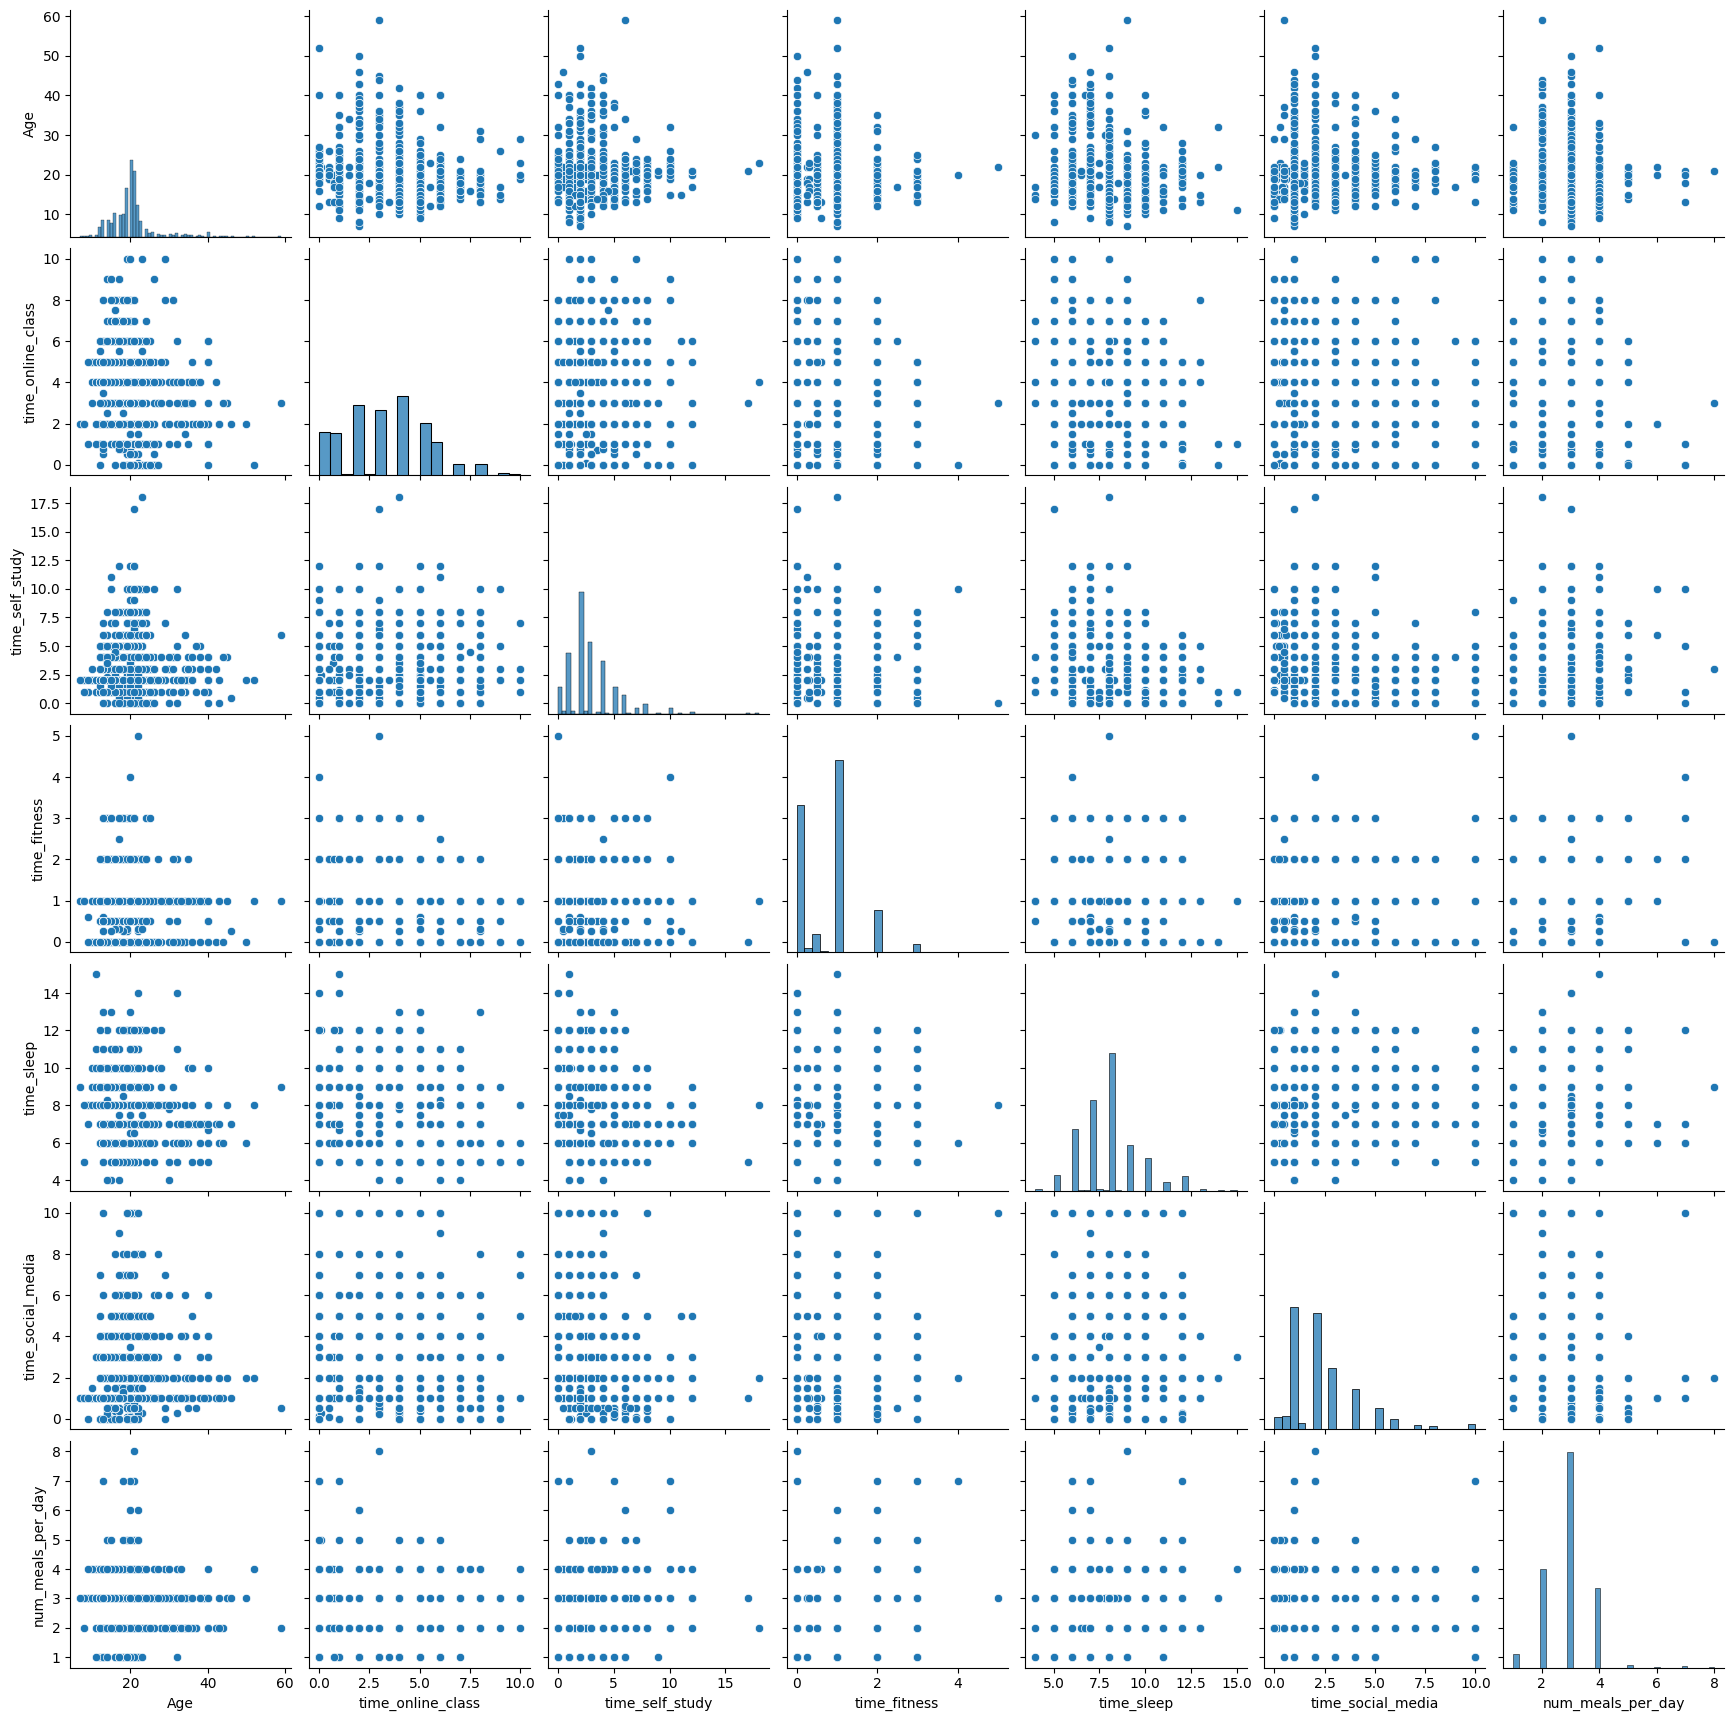

In [20]:
sns.pairplot(df)

In [21]:
fig = px.histogram(df, x='Region',color='Region')
fig.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'time_online_class'}>,
        <Axes: title={'center': 'time_self_study'}>],
       [<Axes: title={'center': 'time_fitness'}>,
        <Axes: title={'center': 'time_sleep'}>,
        <Axes: title={'center': 'time_social_media'}>],
       [<Axes: title={'center': 'num_meals_per_day'}>, <Axes: >,
        <Axes: >]], dtype=object)

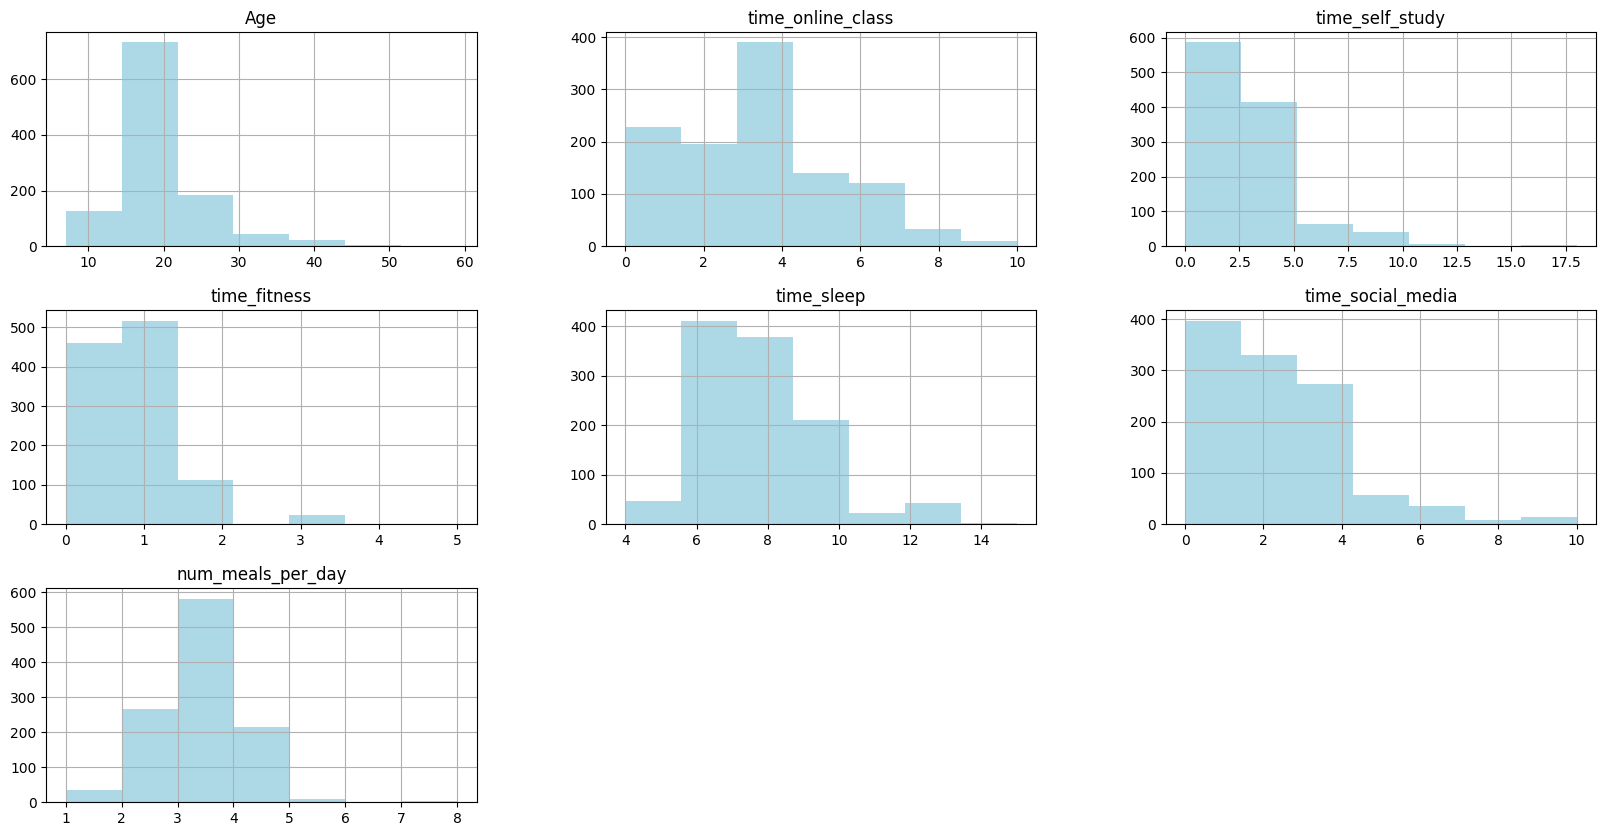

In [22]:
df.hist(figsize=(20,10), bins=7, color='lightblue')

In [23]:
fig = px.histogram(df, x='medium_online_class',color='medium_online_class')
fig.show()

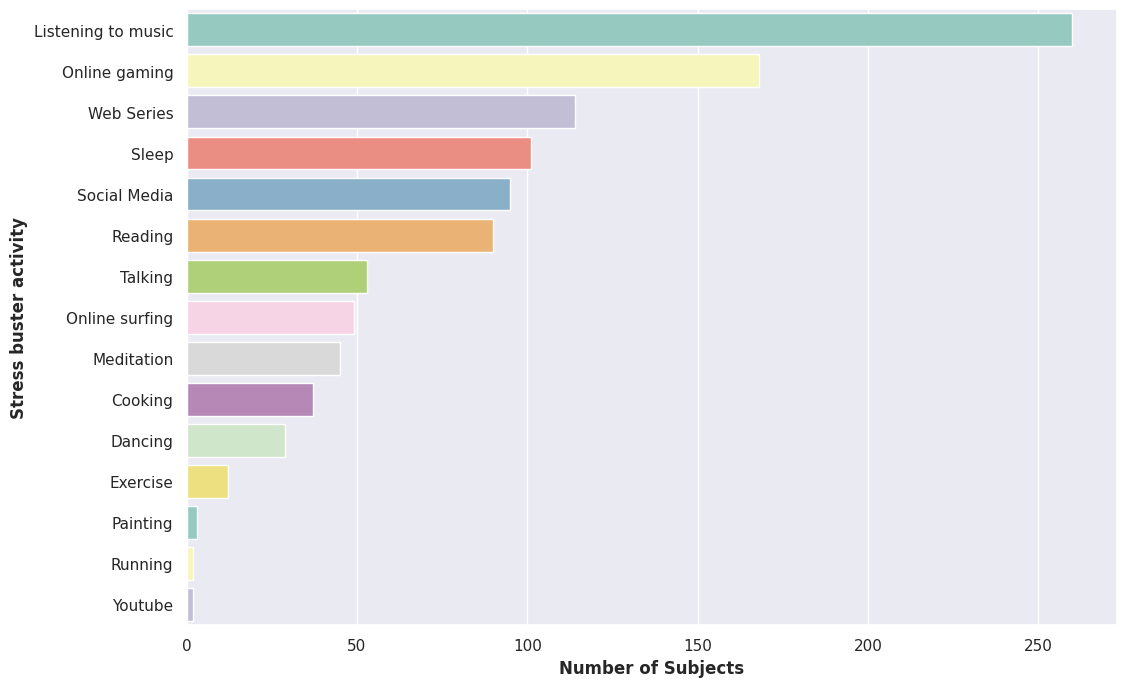

In [24]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='stress_busters', data=df, order=df['stress_busters'].value_counts().index[:15], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("Stress buster activity", weight='bold')
plt.show()

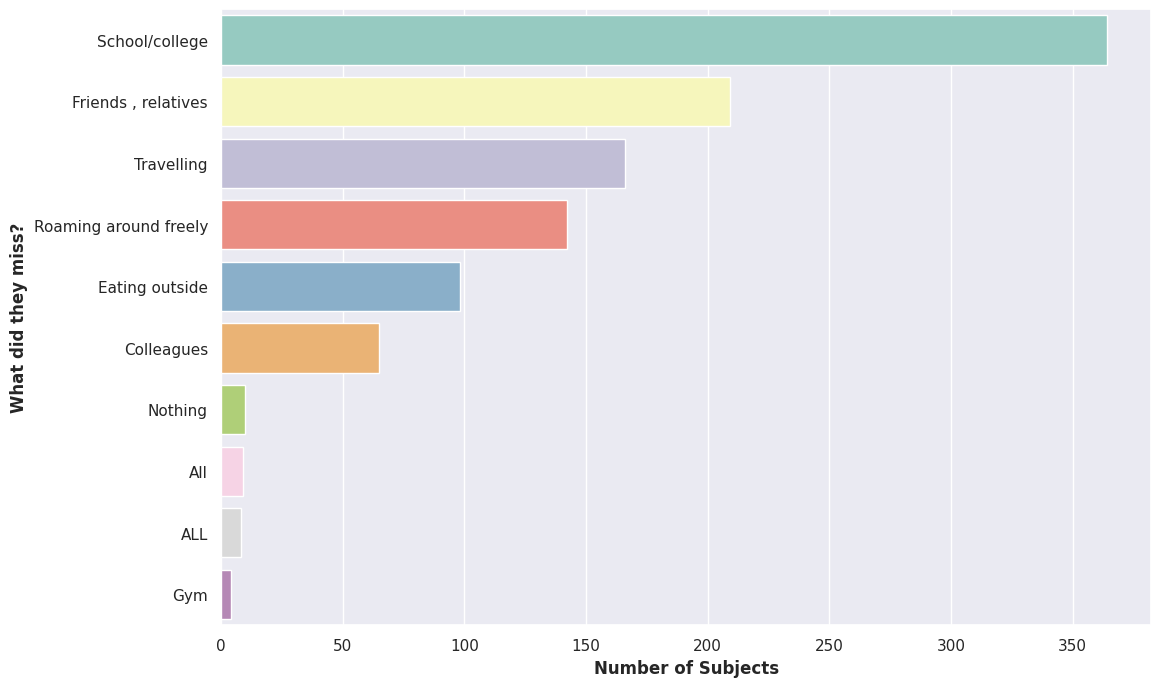

In [25]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='miss_most', data=df, order=df['miss_most'].value_counts().index[:10], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("What did they miss?", weight='bold')
plt.show()

## 4.1 Categorical and Numerical Features

In [26]:
# columns = list(df.columns)

# categoric_columns = []
# numeric_columns = []

categoric_columns= [x for x in df.columns if df.dtypes[x] == 'object']
numeric_columns = [x for x in df.columns if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64']
        
# Assuming the first column is an ID or non-numeric feature
# numeric_columns = numeric_columns[1:]
categoric_columns = categoric_columns[1:]

print('Numerical Features: ', numeric_columns)
print('Categorical Features: ', categoric_columns)

Numerical Features:  ['Age', 'time_online_class', 'time_self_study', 'time_fitness', 'time_sleep', 'time_social_media', 'num_meals_per_day']
Categorical Features:  ['Region', 'rating_online_class', 'medium_online_class', 'preferred_social_media', 'time_tv', 'change_in_wt', 'health_issue_lockdown', 'stress_busters', 'time_utilized', 'more_connected', 'miss_most']


## 4.2 Distribution of Categorical features

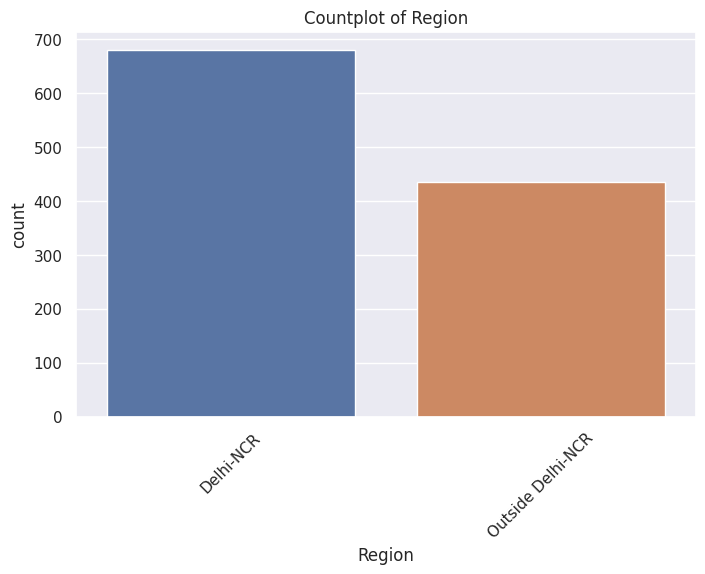

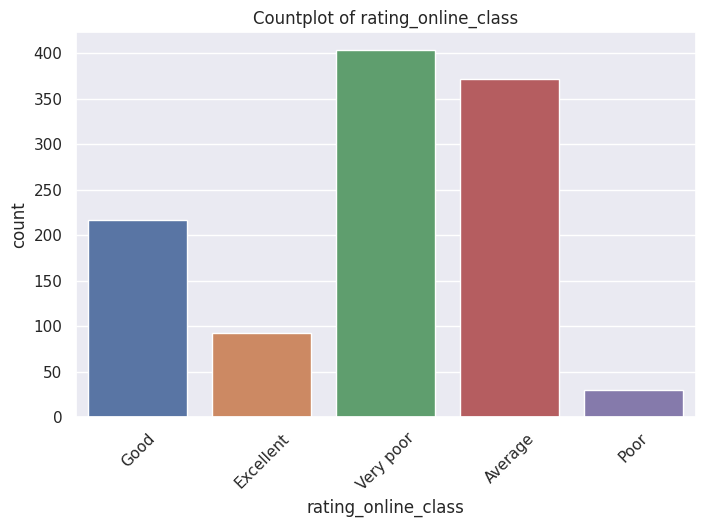

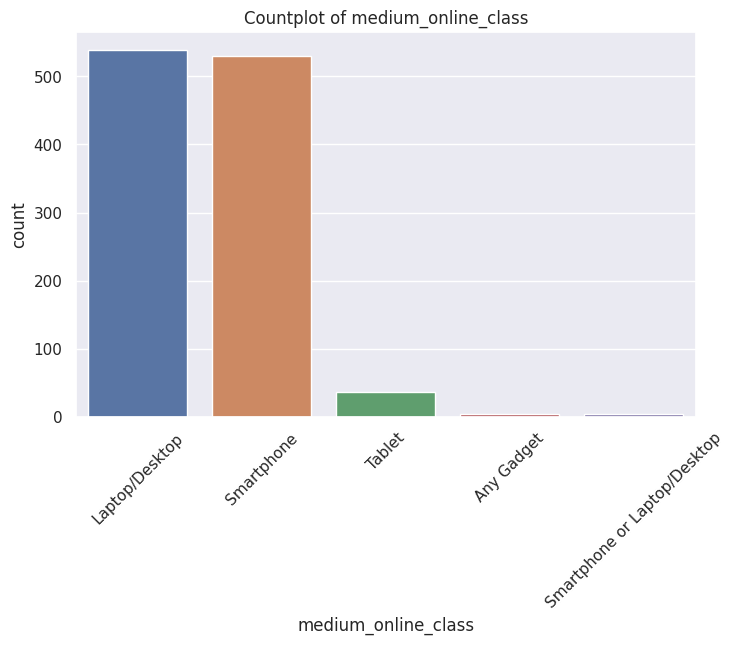

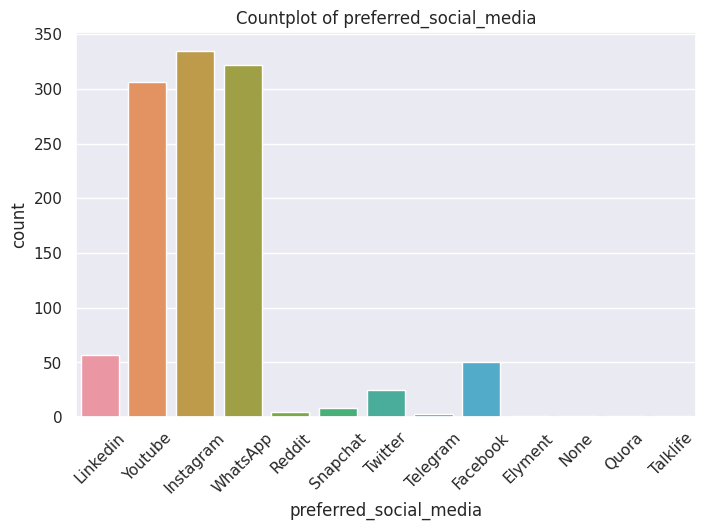

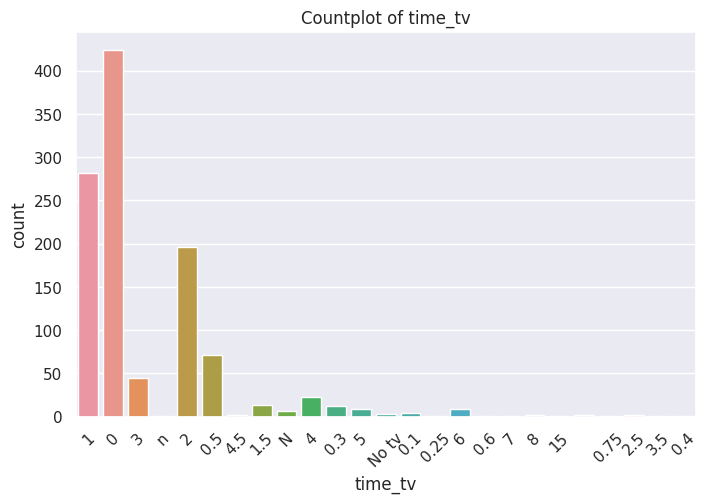

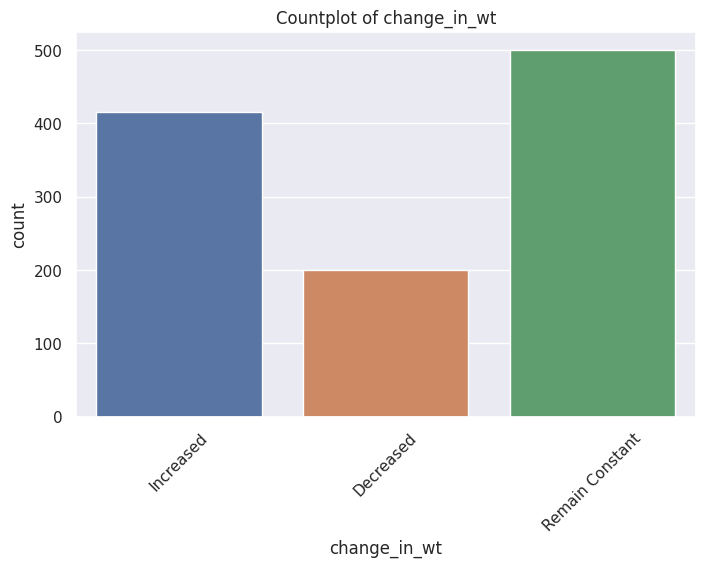

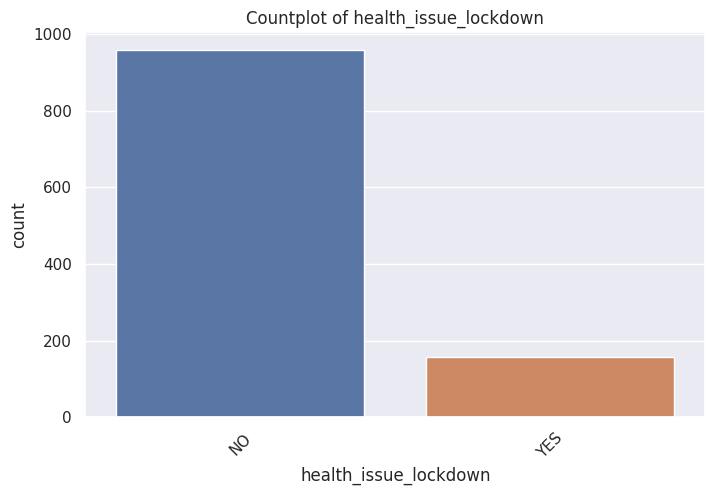

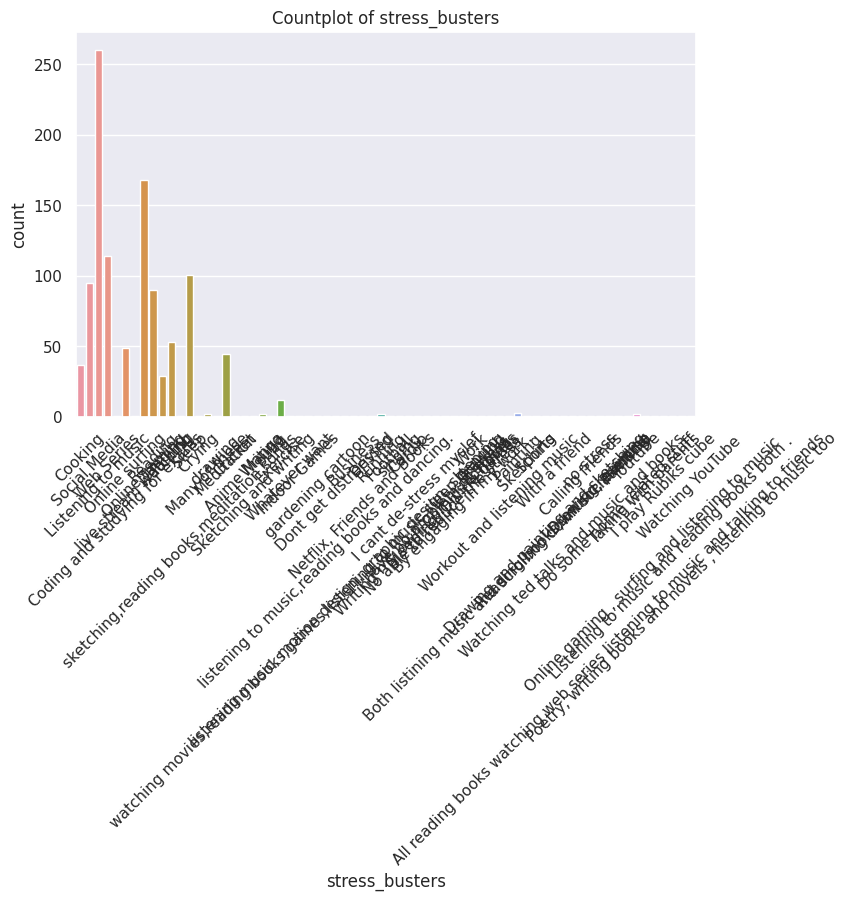

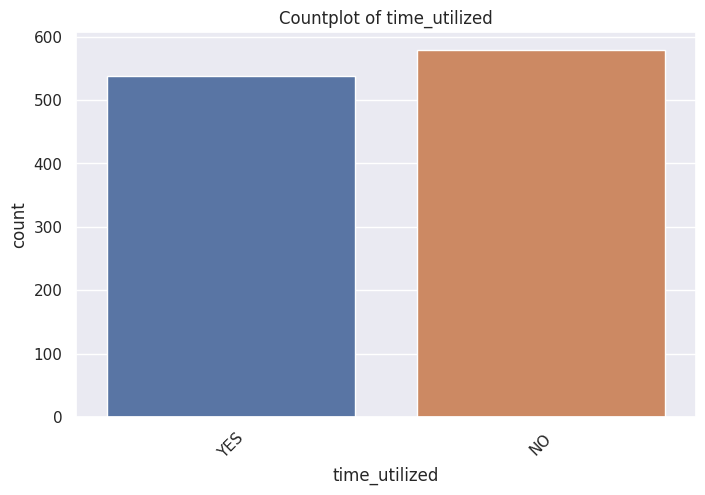

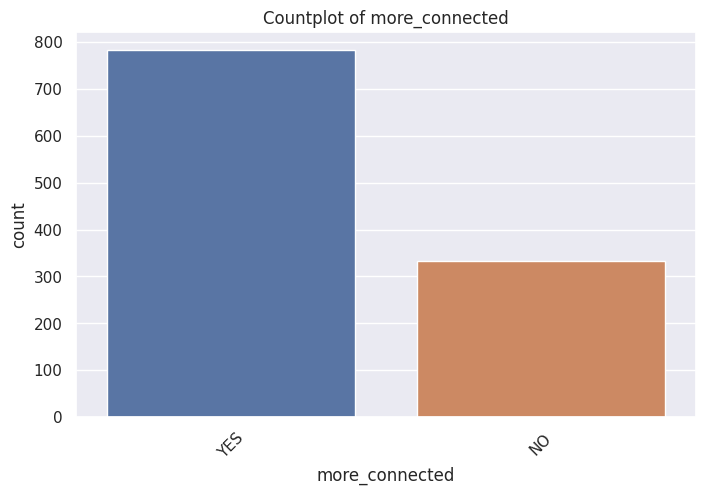

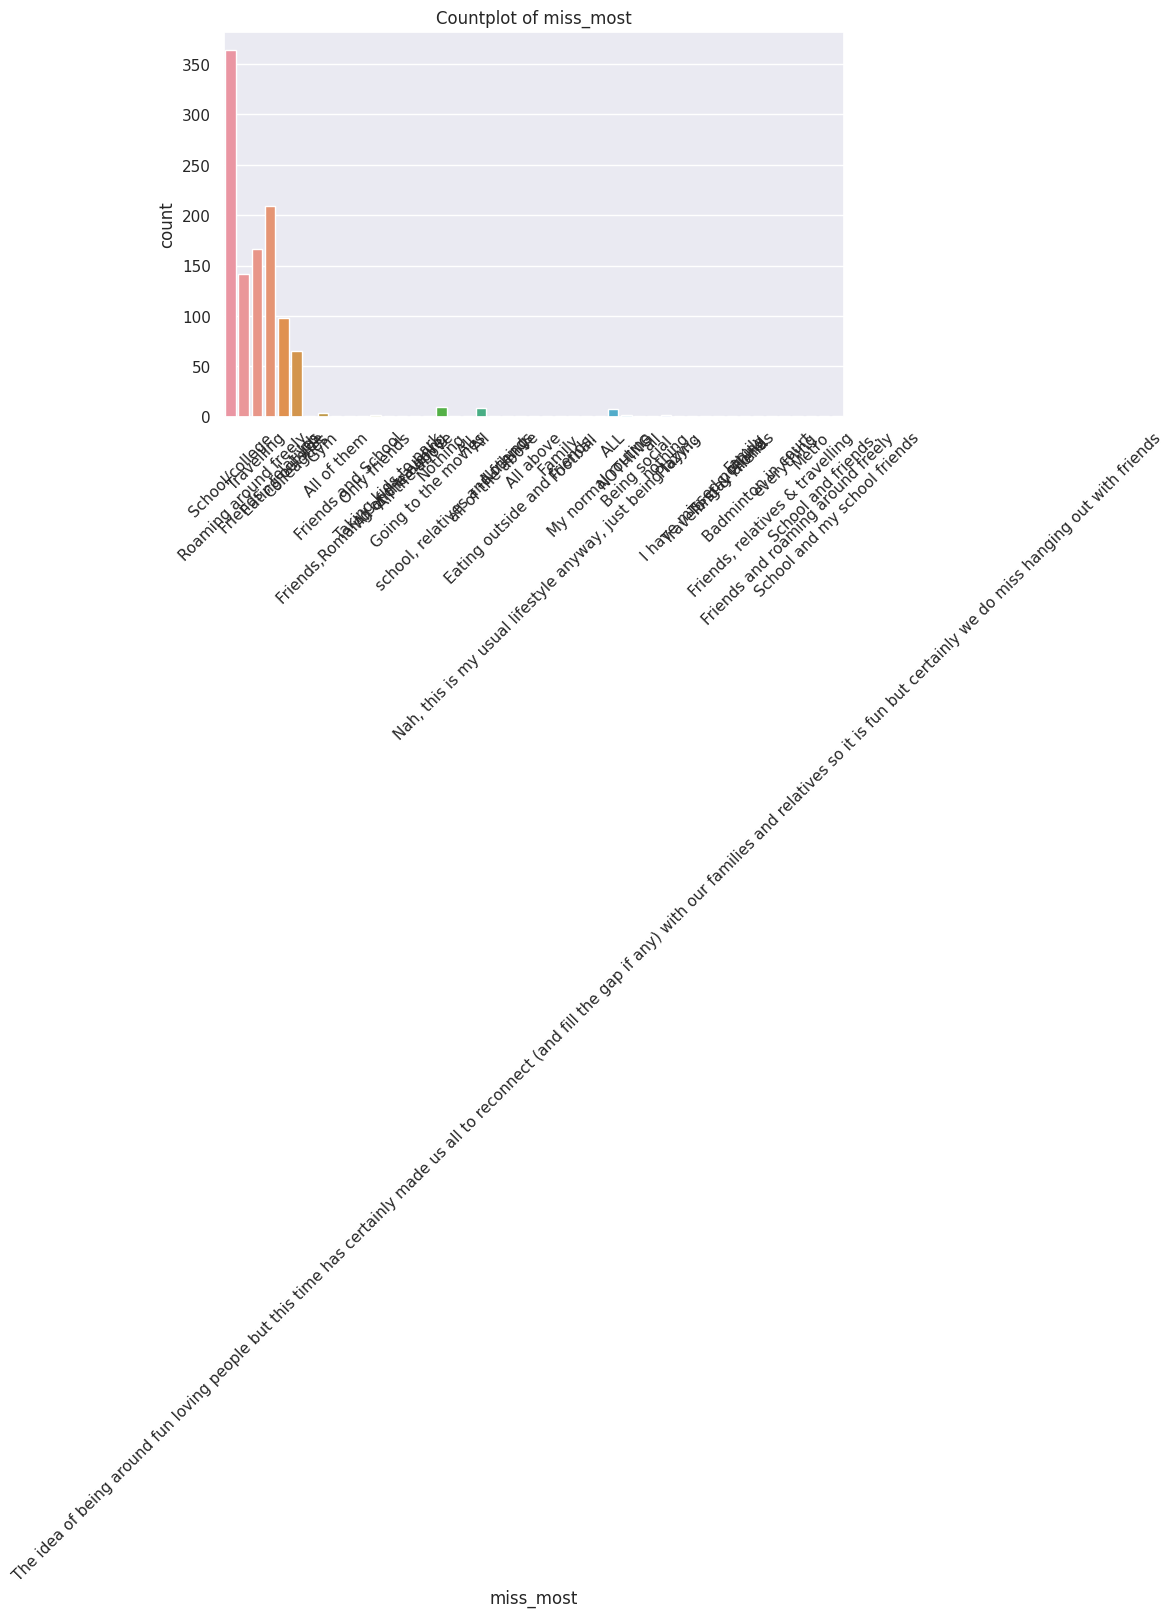

In [27]:
# Plot countplots for each categorical column
for column in categoric_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45) #Roatate x labels if they are too long
    plt.show()

- People from Delhi-NCR is more
- most of the rating for online classes is in very poor and average state(very poor have more votes)
- Usage of Desktop/Laptop and smartphone have increased this time
- Usage of YouTubr, Instagram and WhatsApp is more

## 4.3 Distribution of Numerical Features

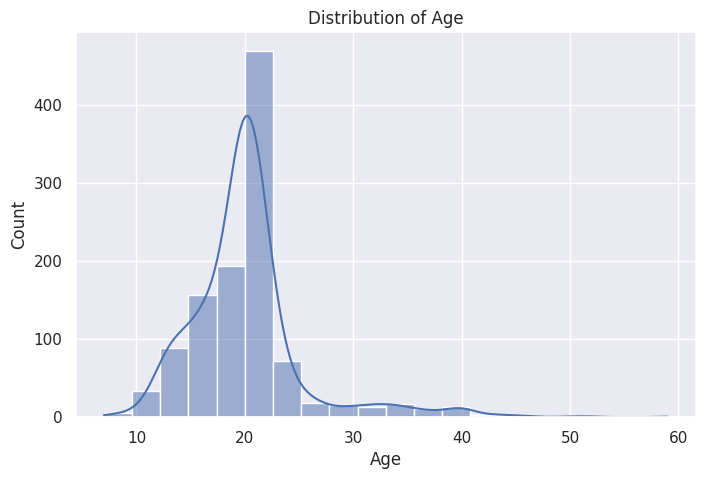

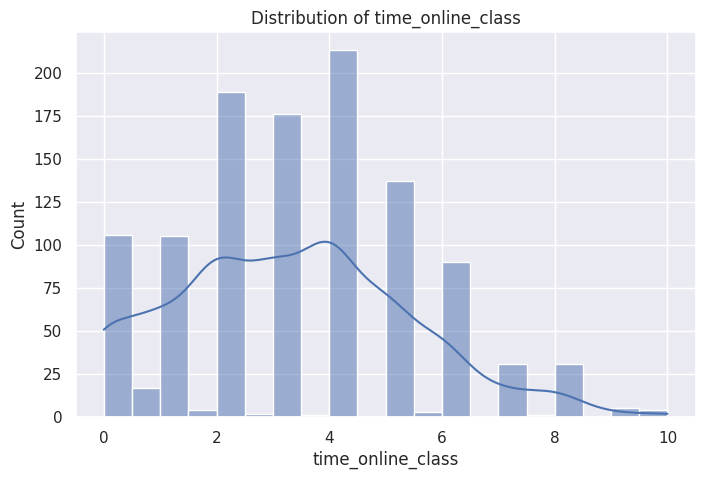

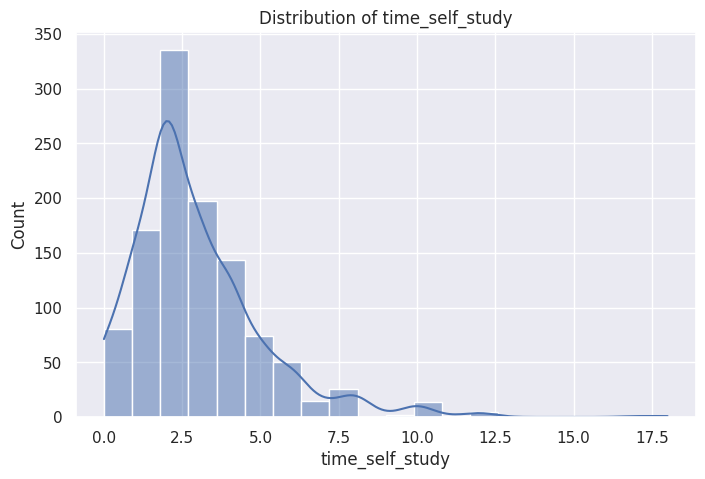

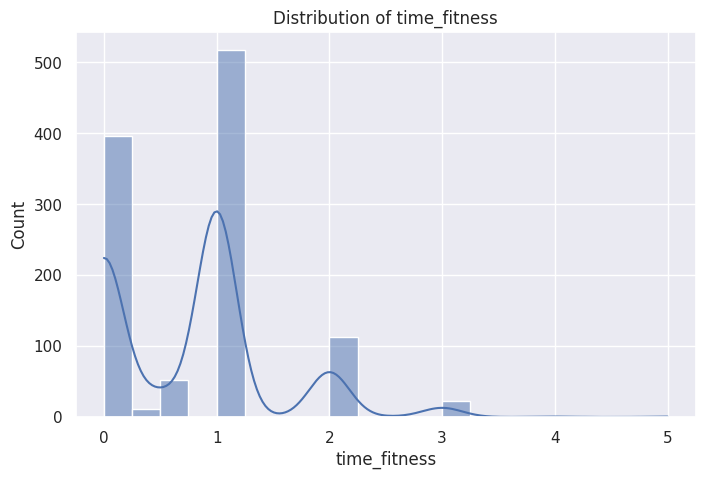

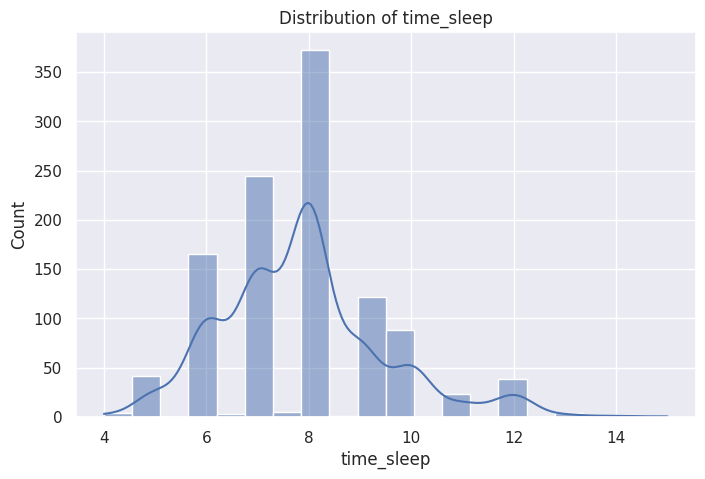

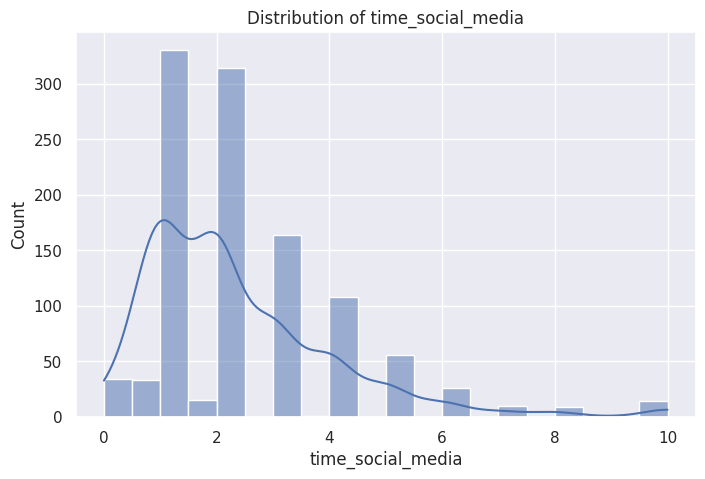

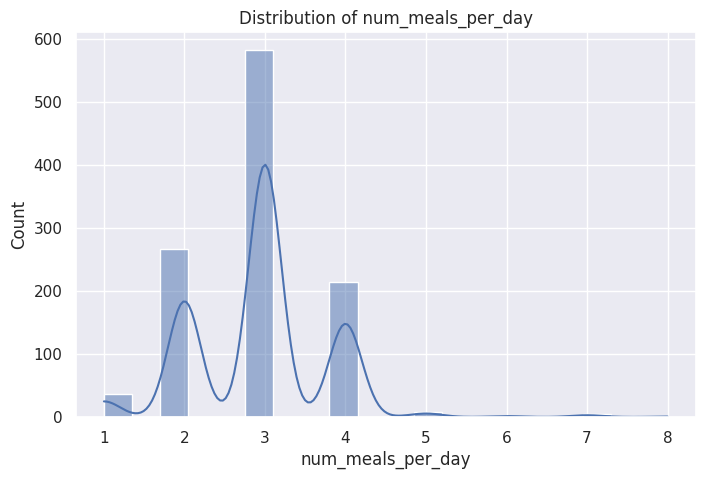

In [28]:
# Plot histogram for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

# 5. Encoding Numerical and Categorical features

In [29]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:
    df[column] = label_encoder.fit_transform(df[column])
    
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 6. Exploring Correlations

## 6.1 Heatmap

In [30]:
df.drop('ID', axis=1, inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in categoric_columns:
    df[column] = encoder.fit_transform(df[column])
df.head()

,Region,Age,time_online_class,rating_online_class,medium_online_class,time_self_study,time_fitness,time_sleep,time_social_media,preferred_social_media,time_tv,num_meals_per_day,change_in_wt,health_issue_lockdown,stress_busters,time_utilized,more_connected,miss_most
0,0,0.155215,-0.628433,2,1,0.501430,-1.055627,-0.535267,0.354077,3,9,1.299989,1,0,9,1,1,36
1,0,0.155215,-1.590244,1,2,-1.366108,1.705072,1.338979,0.354077,12,1,0.088043,0,0,45,1,0,33
2,0,-0.027343,1.776093,4,1,0.034545,-1.055627,-1.160016,-0.217883,3,1,0.088043,2,0,26,0,1,40
3,0,-0.027343,-0.147528,4,2,-0.432339,0.324723,-1.160016,1.497997,2,1,0.088043,0,0,51,0,0,16
4,0,0.155215,-0.147528,2,1,0.034545,0.324723,0.089482,0.354077,2,9,1.299989,2,0,45,0,0,40


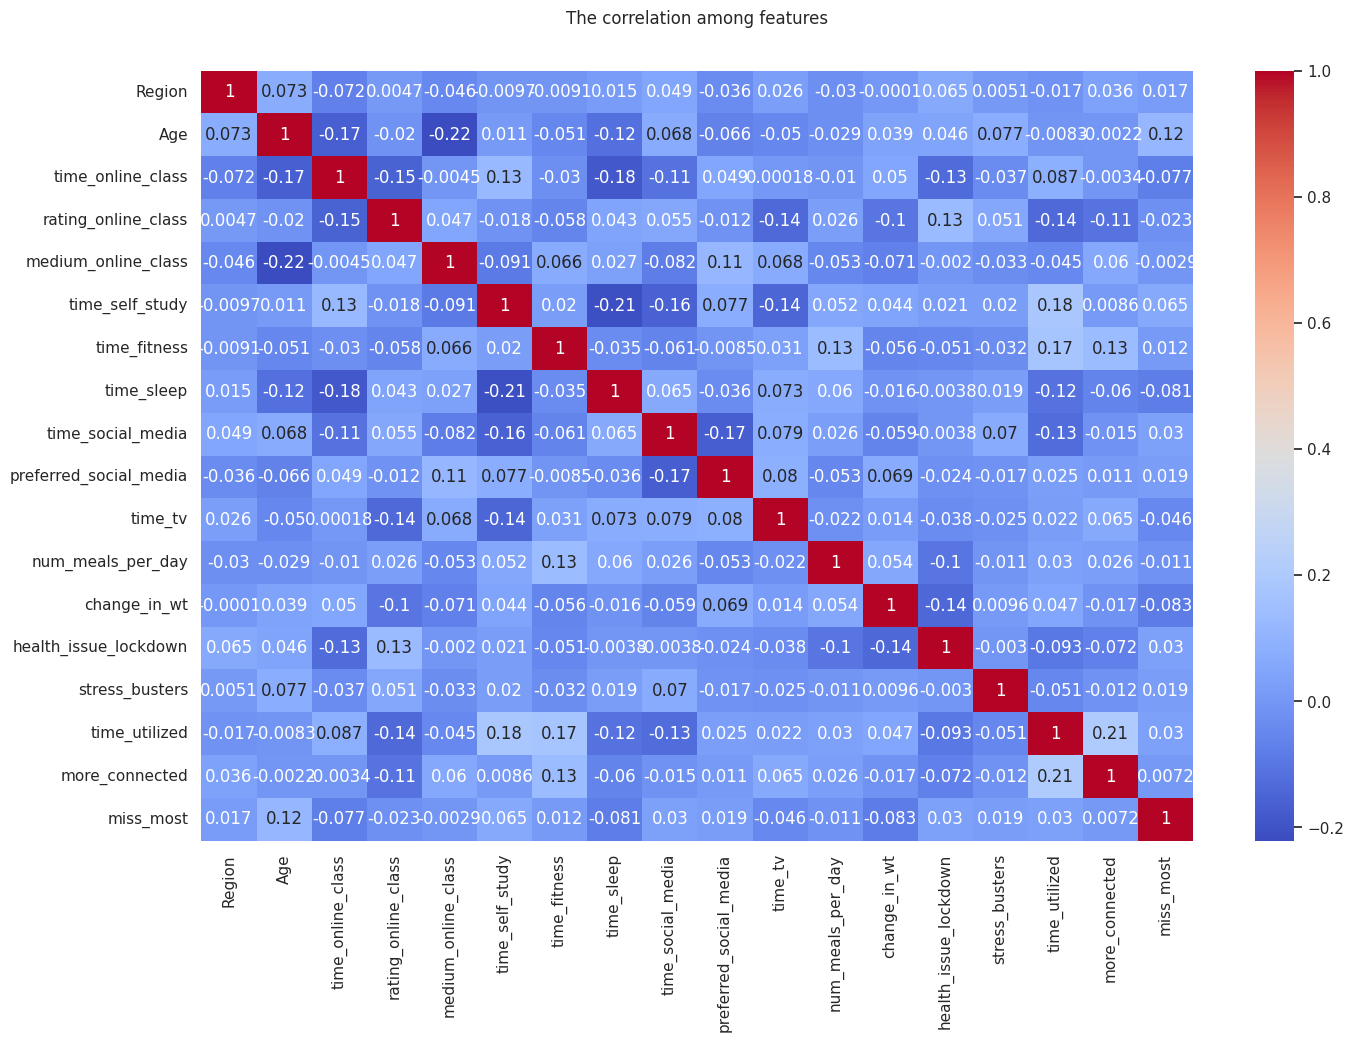

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('The correlation among features', y=1.05)
plt.show()

**Find the strongest correlation**

In [33]:
grade_class_corr = df.corr(numeric_only=True)['more_connected'].drop('more_connected')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f'The strongest correlation with the more_connected is {strongest_correlation} with a value of {strongest_correlation_value:.2f}')

The strongest correlation with the more_connected is time_utilized with a value of 0.21


## 6.2 ViolinPlot

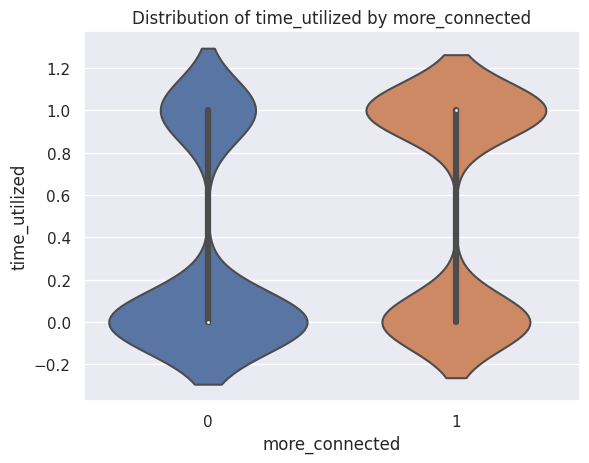

In [34]:
sns.violinplot(data=df, x='more_connected', y='time_utilized')
plt.title(f'Distribution of time_utilized by more_connected')
plt.show()

# 7. Model Selection

In [35]:
X = df.drop(["health_issue_lockdown"],axis=1)
y = df["health_issue_lockdown"]

In [36]:
# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 7.1 Feature Importance

In [37]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X,y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

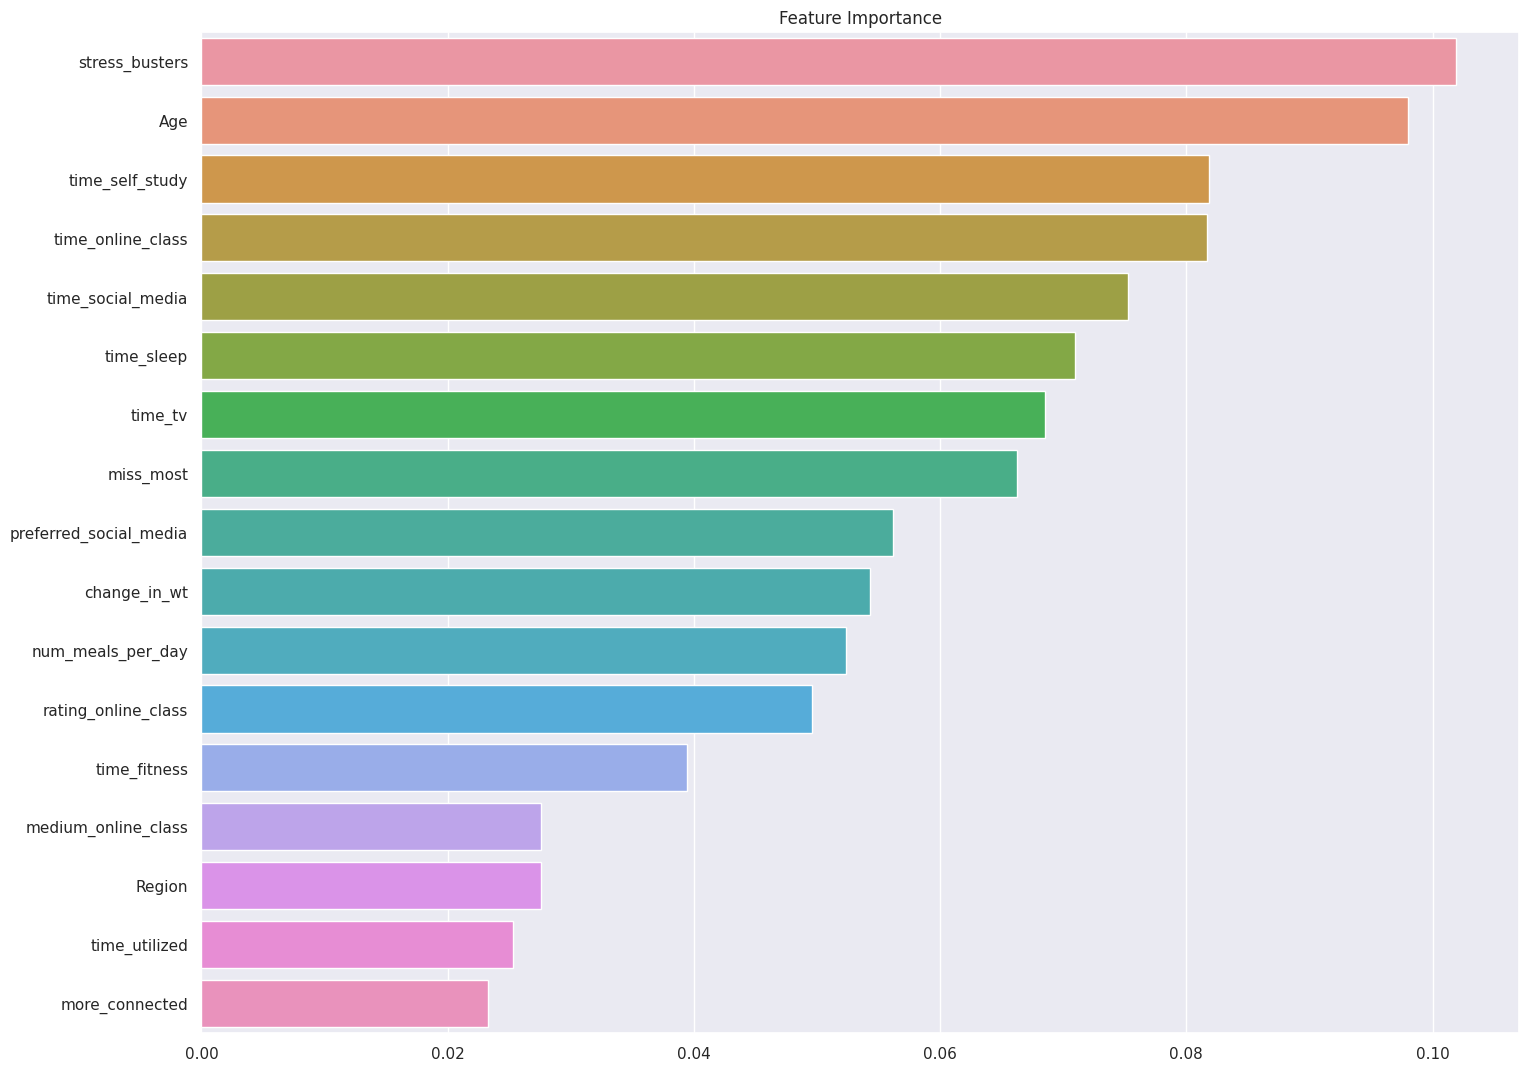

In [38]:
plt.figure(figsize=(17,13))
plt.title("Feature Importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

## 7.2 Classification Models

In [39]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and Evaluate the model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')
    
# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.86
K-Nearest Neighbors accuracy: 0.84
Support Vector Machine accuracy: 0.86
Decision Tree accuracy: 0.78
Random Forest accuracy: 0.86
Gradient Boosting accuracy: 0.86
AdaBoost accuracy: 0.83
Gaussian Naive Bayes accuracy: 0.83
XGBoost accuracy: 0.83
CatBoost accuracy: 0.85


In [40]:
# Find the maximum accuracy
max_accuracy = max(accuracies)

# Find all indices where the accuracy is equal to the maximum accuracy
best_indices = [i for i, accuracy in enumerate(accuracies) if accuracy == max_accuracy]

# Retrieve the names and models of all best models
best_model_names = [model_names[i] for i in best_indices]
best_models = [classification_models[name] for name in best_model_names]

# Print the best models and their accuracy
print(f'The best models with an accuracy of {max_accuracy:.2f} are:')
for name in best_model_names:
    print(f' - {name}')

The best models with an accuracy of 0.86 are:
 - Logistic Regression
 - Gradient Boosting


## 7.3 Neural Network

In [41]:
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled.shape

(892, 17)

In [44]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(17,)),
    Dense(256, activation='relu'),
#     Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(96, activation='relu'),
#     Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
#     Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history=model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8355 - loss: 1.0314 - val_accuracy: 0.8268 - val_loss: 0.4931
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8736 - loss: 0.3941 - val_accuracy: 0.8268 - val_loss: 0.4510
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8696 - loss: 0.3543 - val_accuracy: 0.8268 - val_loss: 0.4297
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8528 - loss: 0.3612 - val_accuracy: 0.8268 - val_loss: 0.5401
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8686 - loss: 0.3418 - val_accuracy: 0.8324 - val_loss: 0.4245
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8981 - loss: 0.3114 - val_accuracy: 0.8156 - val_loss: 0.4259
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8944 - loss: 0.2888 - val_accuracy: 0.8156 - val_loss: 0.4425
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8942 - loss: 0.2795 - val_accuracy: 0.8156 - val_loss

In [47]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print()
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.7824 

Test loss: 0.7765843272209167, Test accuracy: 0.7937219738960266


## 7.4 Confusion Mtrix

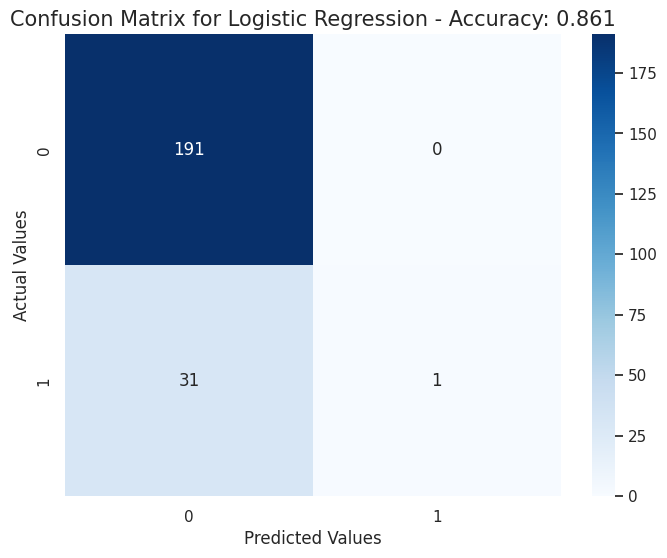

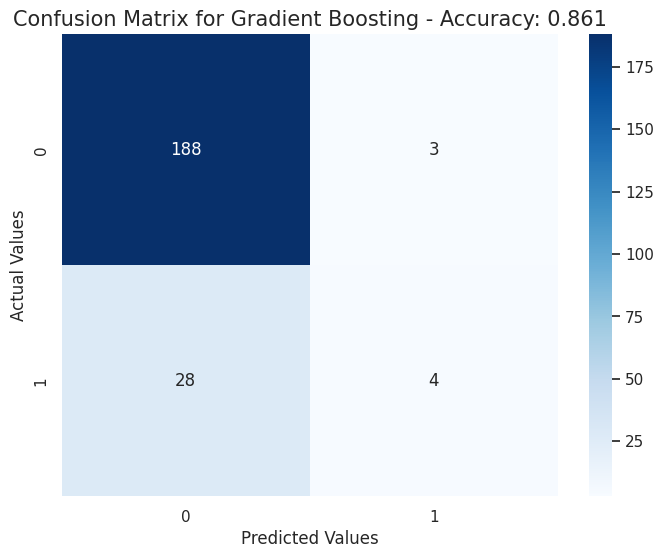

In [48]:
# Loop through each of the best models
for name, model in zip(best_model_names, best_models):
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    model_score = model.score(X_test, y_test)
    
    # Calculate the Confusion Matrix
    score = round(accuracy_score(y_test, y_pred), 3)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(f'Confusion Matrix for {name} - Accuracy: {score}', size=15)
    plt.show()

# 8. Reducing Dimensionality

In [49]:
fimp.head(17)

stress_busters            0.101917
Age                       0.098026
time_self_study           0.081830
time_online_class         0.081691
time_social_media         0.075282
time_sleep                0.070984
time_tv                   0.068481
miss_most                 0.066241
preferred_social_media    0.056161
change_in_wt              0.054276
num_meals_per_day         0.052346
rating_online_class       0.049592
time_fitness              0.039449
medium_online_class       0.027618
Region                    0.027548
time_utilized             0.025294
more_connected            0.023265
dtype: float64

considering probabilities > 0.05

In [50]:
X_train = X_train[['stress_busters','Age','time_self_study','time_online_class','time_social_media','time_sleep','time_tv','miss_most','preferred_social_media','change_in_wt','num_meals_per_day']]
X_test = X_test[['stress_busters','Age','time_self_study','time_online_class','time_social_media','time_sleep','time_tv','miss_most','preferred_social_media','change_in_wt','num_meals_per_day']]

In [51]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and Evaluate the model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')
    
# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.86
K-Nearest Neighbors accuracy: 0.84
Support Vector Machine accuracy: 0.86
Decision Tree accuracy: 0.78
Random Forest accuracy: 0.87
Gradient Boosting accuracy: 0.86
AdaBoost accuracy: 0.85
Gaussian Naive Bayes accuracy: 0.85
XGBoost accuracy: 0.83
CatBoost accuracy: 0.85


There is not that much change is happening here. So, all the features are contibuting a learning feature to get the better result